In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Load the dataset
df = pd.read_csv(r'C:\Users\admin\Documents\AI\Sem-2\Capstone\fake-product-review-detection\dataset.csv')

In [8]:
# Display the first few rows of the dataset
print(df.head())

   Unnamed: 0            category  rating label  \
0           0  Home_and_Kitchen_5     5.0    CG   
1           1  Home_and_Kitchen_5     5.0    CG   
2           2  Home_and_Kitchen_5     5.0    CG   
3           3  Home_and_Kitchen_5     1.0    CG   
4           4  Home_and_Kitchen_5     5.0    CG   

                                              text_  
0  love well made sturdi comfort i love veri pretti  
1    love great upgrad origin i 've mine coupl year  
2      thi pillow save back i love look feel pillow  
3             miss inform use great product price i  
4       veri nice set good qualiti we set two month  


In [9]:
# Basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  40432 non-null  int64  
 1   category    40432 non-null  object 
 2   rating      40432 non-null  float64
 3   label       40432 non-null  object 
 4   text_       40431 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 1.5+ MB
None


In [10]:
# Summary statistics
print(df.describe())

         Unnamed: 0        rating
count  40432.000000  40432.000000
mean   20215.500000      4.256579
std    11671.857379      1.144354
min        0.000000      1.000000
25%    10107.750000      4.000000
50%    20215.500000      5.000000
75%    30323.250000      5.000000
max    40431.000000      5.000000


In [11]:
# Check for missing values
print(df.isnull().sum())

Unnamed: 0    0
category      0
rating        0
label         0
text_         1
dtype: int64


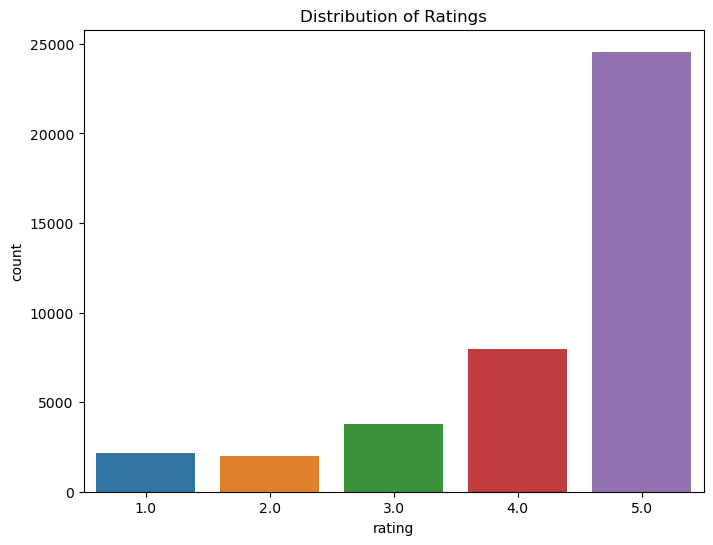

In [12]:
# Check the distribution of ratings
plt.figure(figsize=(8, 6))
sns.countplot(x='rating', data=df)
plt.title('Distribution of Ratings')
plt.show()

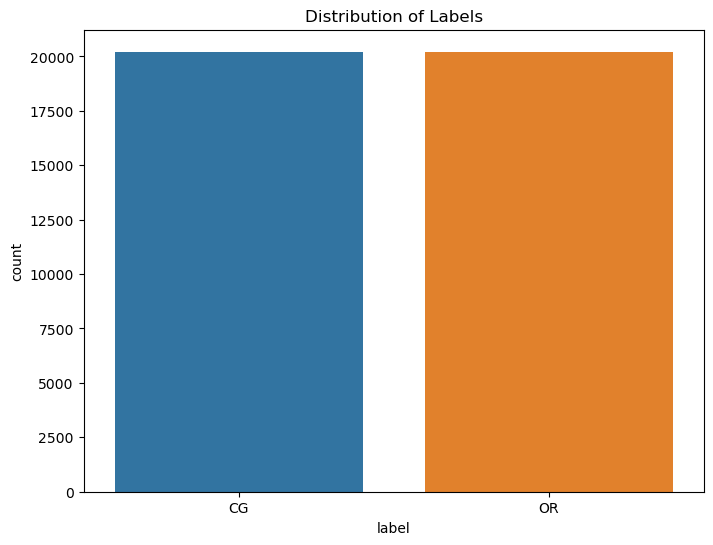

In [13]:
# Check the distribution of labels
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=df)
plt.title('Distribution of Labels')
plt.show()

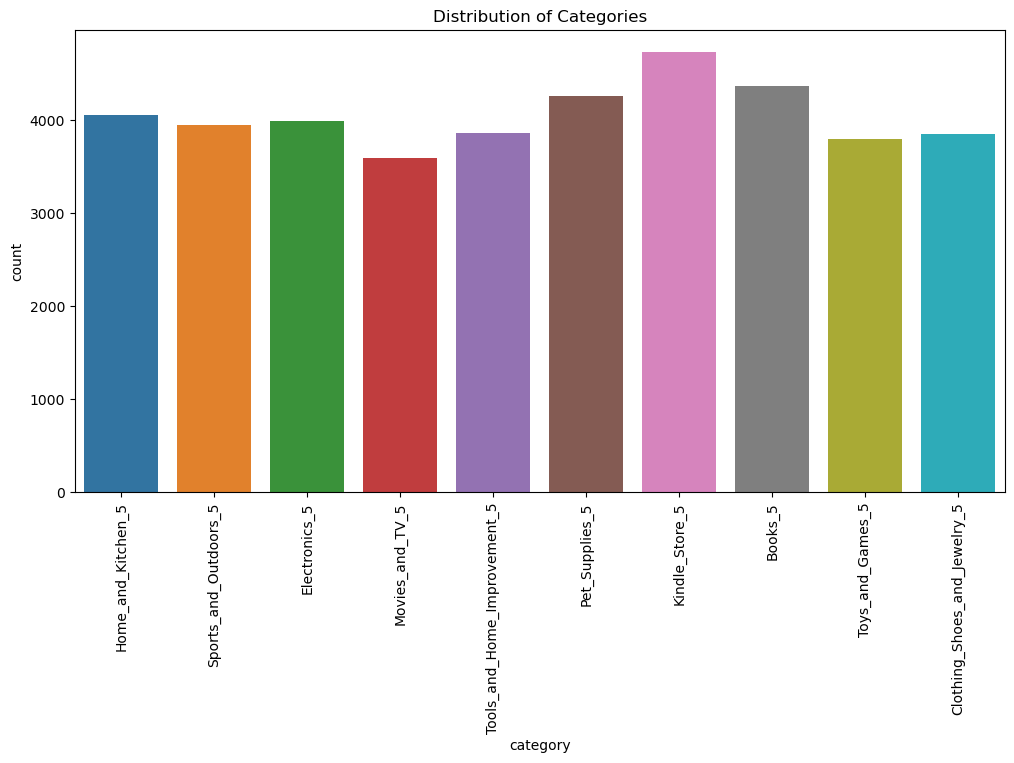

In [14]:
# Check the distribution of categories
plt.figure(figsize=(12, 6))
sns.countplot(x='category', data=df)
plt.title('Distribution of Categories')
plt.xticks(rotation=90)
plt.show()

In [17]:
print(df['text_'].isnull().sum())

1


In [18]:
df['text_'] = df['text_'].fillna('')

In [19]:
# Word cloud for text reviews
from wordcloud import WordCloud

In [20]:
text = ' '.join(df['text_'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

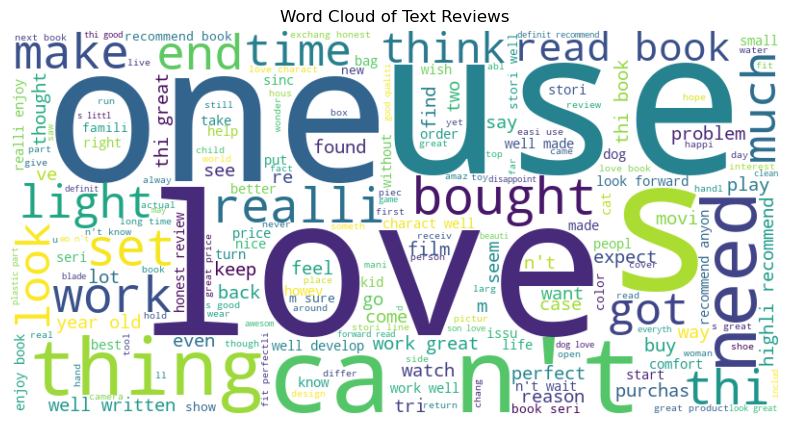

In [21]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Text Reviews')
plt.show()

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# Encode the labels
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text_'], df['label'], test_size=0.2, random_state=42)

# Convert text data to TF-IDF features
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [24]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train_tfidf, y_train)
y_pred_log_reg = log_reg.predict(X_test_tfidf)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))

Logistic Regression Accuracy: 0.8751081983430197
              precision    recall  f1-score   support

           0       0.89      0.86      0.87      4016
           1       0.86      0.89      0.88      4071

    accuracy                           0.88      8087
   macro avg       0.88      0.87      0.88      8087
weighted avg       0.88      0.88      0.88      8087



In [25]:
# Naive Bayes
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)
y_pred_nb = nb.predict(X_test_tfidf)
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.8469148015333251
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      4016
           1       0.87      0.81      0.84      4071

    accuracy                           0.85      8087
   macro avg       0.85      0.85      0.85      8087
weighted avg       0.85      0.85      0.85      8087



In [26]:
# Support Vector Machine
svm = SVC(kernel='linear')
svm.fit(X_train_tfidf, y_train)
y_pred_svm = svm.predict(X_test_tfidf)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.8799307530604674
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      4016
           1       0.88      0.89      0.88      4071

    accuracy                           0.88      8087
   macro avg       0.88      0.88      0.88      8087
weighted avg       0.88      0.88      0.88      8087



In [27]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_tfidf, y_train)
y_pred_rf = rf.predict(X_test_tfidf)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.8595276369481885
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      4016
           1       0.88      0.83      0.86      4071

    accuracy                           0.86      8087
   macro avg       0.86      0.86      0.86      8087
weighted avg       0.86      0.86      0.86      8087

